In [14]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from random import seed, randint

In [15]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,)


In [17]:
test_images, test_labels = X_test.copy(), y_test.copy()

In [18]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = np.reshape(X_train, X_train.shape + (1,))
X_val = np.reshape(X_val, X_val.shape+ (1,))
X_test = np.reshape(X_test, X_test.shape+ (1,))

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(48000, 28, 28, 1) (48000, 10) (12000, 28, 28, 1) (12000, 10) (10000, 28, 28, 1) (10000, 10)


In [19]:
FASHION_LABELS = {
        0: 'T-shirt/top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot',
}

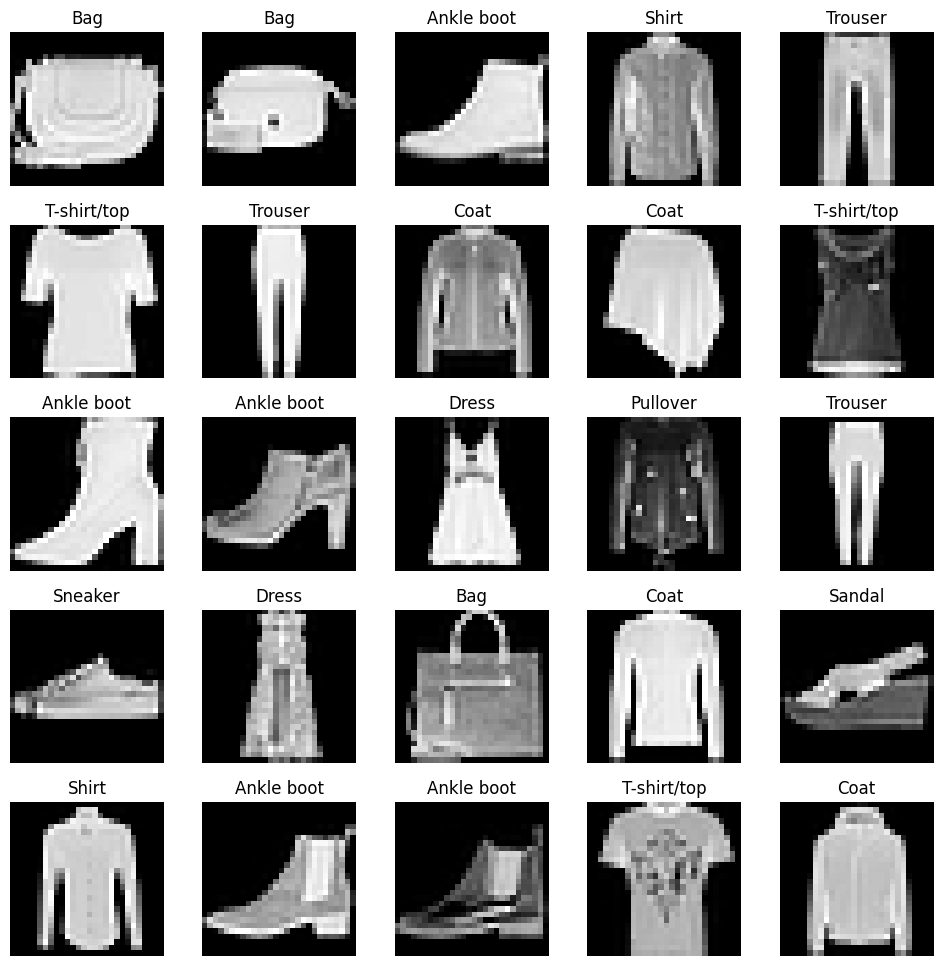

In [20]:
plt.figure(1, figsize=(12,12))
plt.subplots_adjust(hspace=0.25) #, wspace=3)
for i in range(25):
    plt.subplot(5, 5, i+1)
    j = randint(0, test_labels.shape[0]-1)
    plt.imshow(test_images[j], cmap='gray', interpolation='none')
    plt.title('{}'.format(FASHION_LABELS[test_labels[j]]))
    plt.axis("off")
plt.show()

In [21]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
model = Sequential()

l2_lambda = 0.0001
dropout_rate = 0.4

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda), input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(Dropout(dropout_rate))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 batch_normalization_7 (Bat  (None, 26, 26, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                      

In [23]:
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # sparse_

In [24]:
epochs = 40
batch_size = 50

# model training
best_model_file = 'best_regcnn_fashion'
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = best_model_file,
    save_weights_only = True,
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True,
    save_freq='epoch'
)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[model_checkpoint])

Epoch 1/40
960/960 [==============================] - 19s 16ms/step - loss: 0.7924 - accuracy: 0.7843 - val_loss: 0.5609 - val_accuracy: 0.8639
Epoch 2/40
960/960 [==============================] - 15s 16ms/step - loss: 0.5697 - accuracy: 0.8708 - val_loss: 0.5122 - val_accuracy: 0.8842
Epoch 3/40
960/960 [==============================] - 16s 16ms/step - loss: 0.5327 - accuracy: 0.8844 - val_loss: 0.4676 - val_accuracy: 0.9038
Epoch 4/40
960/960 [==============================] - 15s 16ms/step - loss: 0.5148 - accuracy: 0.8925 - val_loss: 0.4584 - val_accuracy: 0.9103
Epoch 5/40
960/960 [==============================] - 15s 16ms/step - loss: 0.5123 - accuracy: 0.8973 - val_loss: 0.4756 - val_accuracy: 0.9053
Epoch 6/40
960/960 [==============================] - 15s 16ms/step - loss: 0.4912 - accuracy: 0.9051 - val_loss: 0.4509 - val_accuracy: 0.9153
Epoch 7/40
960/960 [==============================] - 15s 16ms/step - loss: 0.4974 - accuracy: 0.9063 - val_loss: 0.4647 - val_accuracy:

In [25]:
# recovering the best model
model.load_weights(best_model_file)

train_results = model.evaluate(X_train, y_train, verbose=0)
print('Error (loss) sobre datos de entrenamiento: {:.4f}'.format(train_results[0]))
print('Tasa de éxito de clasificación (accuracy) sobre datos de entrenamiento: {:.4f}\n'.format(train_results[1]))

val_results = model.evaluate(X_val, y_val, verbose=0)
print('Error (loss) sobre datos de validación: {0:.4f}'.format(val_results[0]))
print('Tasa de éxito de clasificación (accuracy) sobre datos de validación: {0:.4f}\n'.format(val_results[1]))

test_results = model.evaluate(X_test, y_test, verbose=0)
print('Error (loss) sobre datos de test: {0:.4f}'.format(test_results[0]))
print('Tasa de éxito de clasificación (accuracy) sobre datos de test: {0:.4f}\n'.format(test_results[1]))

Error (loss) sobre datos de entrenamiento: 0.3073
Tasa de éxito de clasificación (accuracy) sobre datos de entrenamiento: 0.9651

Error (loss) sobre datos de validación: 0.3850
Tasa de éxito de clasificación (accuracy) sobre datos de validación: 0.9383

Error (loss) sobre datos de test: 0.4014
Tasa de éxito de clasificación (accuracy) sobre datos de test: 0.9351



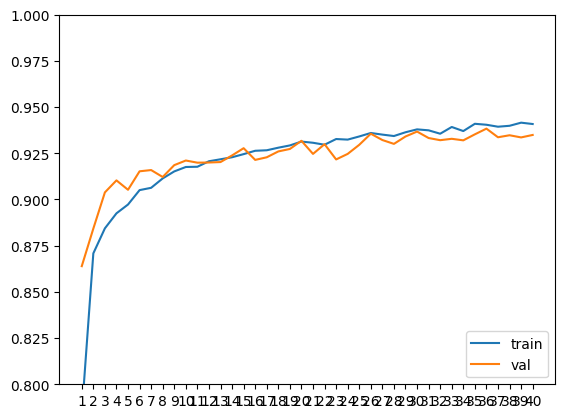

In [26]:
plt.figure(2)
x = range(1,epochs+1)
plt.plot(x, history.history['accuracy'], label='train')
plt.plot(x, history.history['val_accuracy'], label='val')
plt.xticks(x)
plt.ylim(0.8, 1)
plt.legend(loc="lower right")
plt.show()